# RAVDESS Emotion Recognition (Español)
Para este experimento estaremos usando este dataset: "The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)". En la página se nos proporciona audios y videos. En nuestro caso solo usaremos la carpeta de audios. 

Para nombrar sus archivos siguieron la siguiente convención: 


## File naming convention

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

Filename identifiers 

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 02-01-06-01-02-01-12.mp4 

- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12)
- Female, as the actor ID number is even.

## Crear Dataframe
Crearemos un dataframe de pandas para tener mayor facilidad de lectura y trabajo con el dataset.

In [13]:
import os
import pandas as pd


folder = "Audio_Speech_Actors_01-24"
actores_folders = os.listdir(folder)


def transform_readable(car):
    mod = { '01':'full' , '02':'video' , '03':'audio'}
    channel = { '01':'speech','02':'song'}
    emotion = {'01' : 'neutral' , '02': 'calm', '03':'happy', '04':'sad', '05':'angry', '06':'fearful', '07':'disgust', '08' : 'surprised'}
    intensity = {'01':'normal','02':'strong'}
    statement = {'01':'kids','02':'dogs'}
    repetition = {'01':'first','02':'second'}
    actor = lambda ac : 'Female' if int(ac) % 2 == 0 else 'Male'
        
    return [ mod[car[0]] , 
            channel[car[1]] ,
            emotion[car[2]] ,
            intensity[car[3]],
            statement[car[4]] ,
            repetition[car[5]],
            int(car[6]) ,
            actor(car[6]) ]  
    
audio_files = []
#Mostraremos todos los archivos
for actor_folder in actores_folders:
    for x in os.listdir(folder+"/"+actor_folder):
        # audios_files.append( )
        caracteristicas = x[:-4].split("-")
        # print ( caracteristicas)
        audio_files.append( [folder+"/"+actor_folder+"/" +x] + transform_readable(caracteristicas )  ) 

audio_data = pd.DataFrame(audio_files) # [7].value_counts()

## Analizando Audios Files
Utilizaremos la librería librosa que nos permite trabajar con archivos de audio. 

In [14]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

filename_example = audio_data[0][0]

ipd.Audio(filename_example)

77253
sampling rate 22050
47616
[15872 63488]


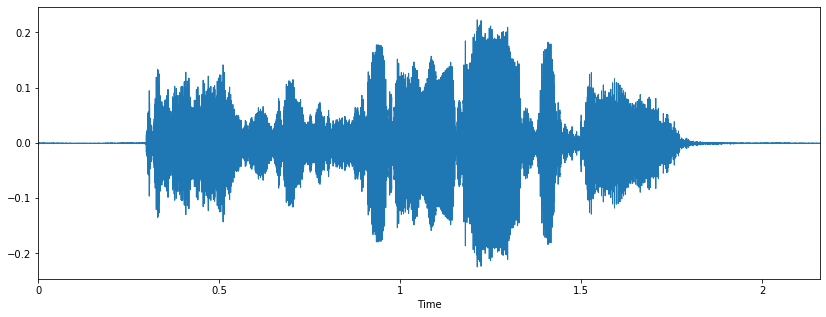

In [15]:
#imagen de la onda
y, sr = librosa.load(filename_example)
print(len(y))
print("sampling rate", sr)

## Borramos Silencio AL inicio y Final 
y,index = librosa.effects.trim(y)
print(len(y))
print(index)



plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

[[-9.085e-03+0.000e+00j  7.246e-04+0.000e+00j  1.765e-02+0.000e+00j ...
   7.874e-03+0.000e+00j -1.024e-03+0.000e+00j -1.237e-02+0.000e+00j]
 [ 7.336e-03-3.456e-19j  2.067e-03+9.624e-03j -1.308e-02+7.145e-03j ...
  -9.384e-03+2.775e-03j -2.313e-04-1.163e-02j  1.225e-02+1.489e-04j]
 [-1.173e-03+3.722e-20j -3.660e-03-4.093e-03j  3.660e-03-2.702e-03j ...
   6.567e-03-3.238e-03j  1.260e-04+6.435e-03j -6.528e-03-9.140e-05j]
 ...
 [-4.229e-04+1.559e-19j  2.040e-04-6.663e-07j  1.109e-05-2.291e-06j ...
   2.097e-07+4.239e-07j -3.284e-06-4.100e-07j  6.067e-06-1.514e-07j]
 [ 4.221e-04-7.454e-20j  1.839e-06-2.155e-04j -7.530e-06+6.873e-07j ...
  -5.391e-07-6.533e-07j -6.550e-07-2.816e-06j -6.381e-06+7.207e-08j]
 [-4.257e-04+0.000e+00j -2.097e-04+0.000e+00j  5.112e-06+0.000e+00j ...
   7.296e-07+0.000e+00j  4.112e-06+0.000e+00j  6.886e-06+0.000e+00j]]


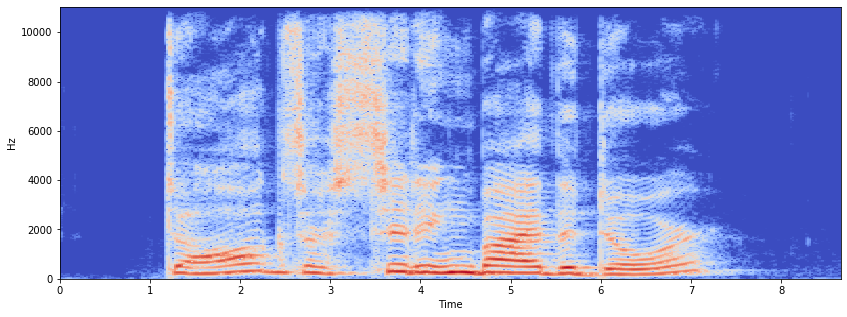

In [16]:
#Spectrograma
X = librosa.stft(y,n_fft=512)
print(X)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

(257, 373)


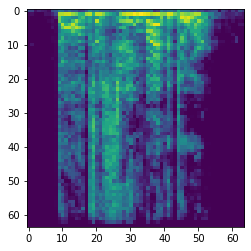

(64, 64)


In [17]:
import numpy as np
np.set_printoptions(precision=3)

import cv2 
data = np.array(Xdb)
print ( data.shape )
data = cv2.resize(data,(64,64))
plt.imshow(data)
plt.show()

print(data.shape)

## Transformando toda la data

In [24]:
import nlpaug.augmenter.audio as naa


dim = 64
def get_spec(y):
    X = librosa.stft(y,n_fft=512)
    Xdb = librosa.amplitude_to_db(abs(X))
    data = np.array(Xdb)
    data = cv2.resize(data,(dim,dim))
    return data

def augment1(y,sr):
    aug = naa.CropAug(sampling_rate=sr)
    augmented_data = aug.augment(y)
    return get_spec(augmented_data)

def augment2(y,sr):    
    aug = naa.LoudnessAug(factor=(2, 5))
    augmented_data = aug.augment(y)
    return get_spec(augmented_data)
    
def augment3(y,sr):
    aug = naa.NoiseAug(noise_factor=0.03)
    augmented_data = aug.augment(y)
    return get_spec(augmented_data)

def augment4(y,sr):
    aug = naa.ShiftAug(sampling_rate=sr)
    augmented_data = aug.augment(y)
    return get_spec(augmented_data)

def augment5(y,sr):
    aug = naa.PitchAug(sampling_rate=sr)
    augmented_data = aug.augment(y)
    return get_spec(augmented_data)

def augment6(y,sr):
    aug = naa.SpeedAug()
    augmented_data = aug.augment(y)
    return get_spec(augmented_data)

print(len(audio_files))

i=0

augmentacion = []

for audio in audio_files:
    print(i)
    i+=1
    
    y, sr = librosa.load(audio[0])
    y,index = librosa.effects.trim(y)
    
    
    
    augmentacion.append( audio+ [augment1(y,sr)] )
    augmentacion.append( audio+ [augment2(y,sr)] )
    augmentacion.append( audio+ [augment3(y,sr)] )
    augmentacion.append( audio+ [augment4(y,sr)] )
    augmentacion.append( audio+ [augment5(y,sr)] )
    augmentacion.append( audio+ [augment6(y,sr)] )
    
    

    
    audio.append(get_spec(y))
    
     

pd.DataFrame(audio_files+augmentacion).to_pickle('data_64_aug.pkl')


1440
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


KeyboardInterrupt: 